In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
data=pd.read_csv("StudentsPerformance.csv")
print(data.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
moyenne=np.mean(data["math score"])
print(moyenne)
mediane=np.median(data["math score"])
print(mediane)
mod = data["math score"].mode()
print(mod)

66.089
66.0
0    65
Name: math score, dtype: int64


In [4]:
if abs(moyenne-mediane) < 1:
  print("Distribution symétrique")
elif moyenne<mediane:
  print("Asymétrie négative (queue à gauche)")
else:
  print("Asymétrie positive (queue à droite)")


Distribution symétrique


In [5]:
if moyenne > mediane and mediane > mod.iloc[0]:
    print("Distribution asymétrique à droite (skewness positive)")
elif moyenne < mediane and mediane < mod.iloc[0]:
    print("Distribution asymétrique à gauche (skewness négative)")
else:
    print("Distribution symétrique (proche d’une loi normale)")

Distribution asymétrique à droite (skewness positive)


In [6]:
etendue_math=data["math score"].max()-data["math score"].min()
print(etendue_math)
etendue_reading=data["reading score"].max()-data["reading score"].min()
print(etendue_reading)
etendue_writing=data["writing score"].max()-data["writing score"].min()
print(etendue_writing)
if etendue_math > etendue_reading and etendue_math > etendue_writing:
  print("scores math a la plus grande etendue")
elif etendue_reading > etendue_math and etendue_reading>etendue_writing:
  print("score reading a la plus grande etendue")
else:
  print("score writing a la plus grande etendue")

print('score math a la grande variabilité entre les étudiants')
print("reading score a lescores homogènes")

100
83
90
scores math a la plus grande etendue
score math a la grande variabilité entre les étudiants
reading score a lescores homogènes


In [7]:
ecart_math=data["math score"].std()
print(ecart_math)
ecart_reading=data["reading score"].std()
print(ecart_reading)
ecart_writing=data["writing score"].std()
print(ecart_writing)
if ecart_math > ecart_reading and ecart_math > ecart_writing:
  print("scores math a la plus grande variabilité des scores")
elif ecart_reading > ecart_math and ecart_reading>ecart_writing:
  print("score reading a la plus grande variabilité des scores")
else:
  print("score writing a la plus grande variabilité des scores")
ecart_score={"math":ecart_math,"reading":ecart_reading,"writing":ecart_writing}
for matiere, ecart in ecart_score.items():
    if ecart < 15:
        print(f"{matiere} : Faible variabilité (scores homogènes)")
    else:
        print(f"{matiere} :  Forte variabilité (scores hétérogènes)")

15.16308009600945
14.600191937252216
15.19565701086965
score writing a la plus grande variabilité des scores
math :  Forte variabilité (scores hétérogènes)
reading : Faible variabilité (scores homogènes)
writing :  Forte variabilité (scores hétérogènes)


In [8]:
matiere={"math score","reading score","writing score"}
for m in matiere:
  q1 = data[m].quantile(0.25)
  q2 = data[m].quantile(0.50)
  q3 = data[m].quantile(0.75)
  iqr = q3 - q1
  print(f"{m} : Q1={q1}, Q2={q2}, Q3={q3}, IQR={iqr}")
  val_min = q1 - 1.5 * iqr
  val_max = q3 + 1.5 * iqr



writing score : Q1=57.75, Q2=69.0, Q3=79.0, IQR=21.25
math score : Q1=57.0, Q2=66.0, Q3=77.0, IQR=20.0
reading score : Q1=59.0, Q2=70.0, Q3=79.0, IQR=20.0


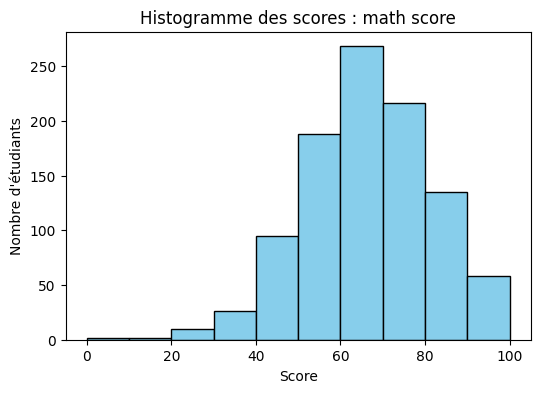

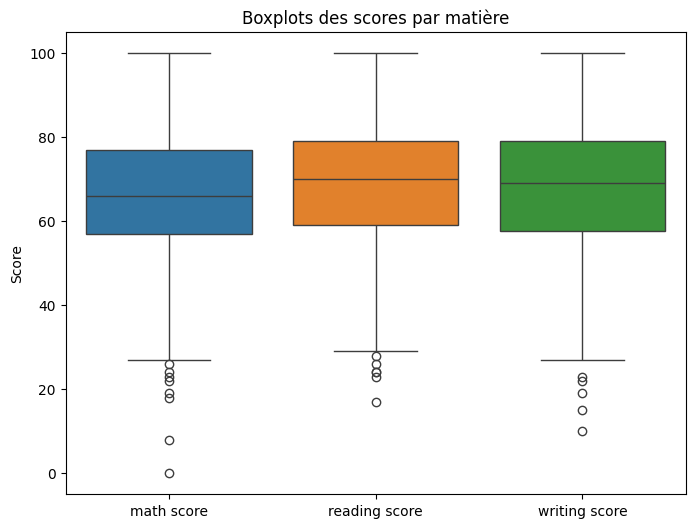

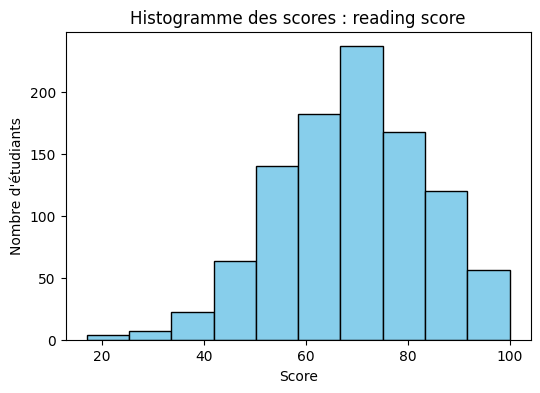

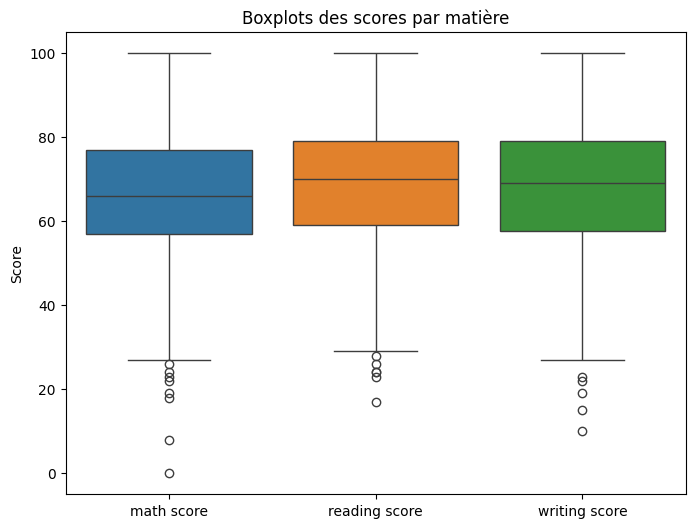

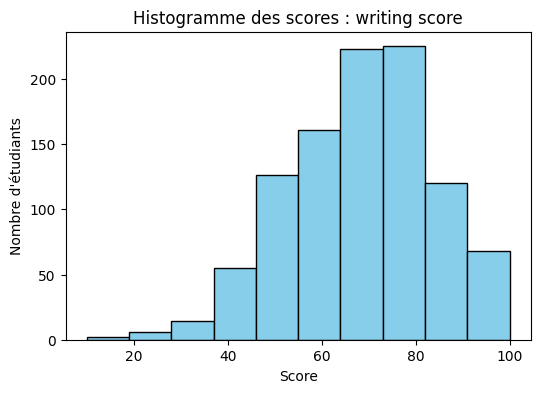

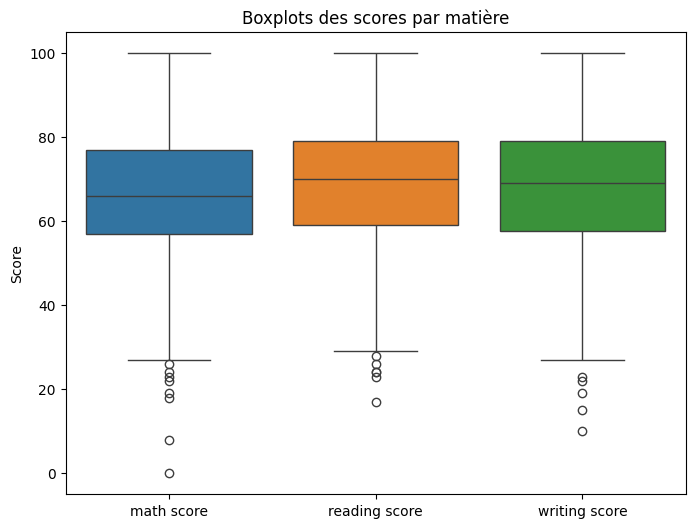

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

matieres = ["math score", "reading score", "writing score"]

for m in matieres:
    plt.figure(figsize=(6,4))
    plt.hist(data[m], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Histogramme des scores : {m}")
    plt.xlabel("Score")
    plt.ylabel("Nombre d'étudiants")
    plt.show()
    plt.figure(figsize=(8,6))
    sns.boxplot(data=data[matieres])
    plt.title("Boxplots des scores par matière")
    plt.ylabel("Score")
    plt.show()

gender_avg_scores = data.groupby('gender')[matieres].mean().T
gender_avg_scores.index.name = 'matiere'
wide_df = gender_avg_scores.reset_index()
fig = px.bar(wide_df, x="matiere", y=["male", "female"], title="Note par genre")
fig.show()

moyenne = data[matieres].mean()
mediane = data[matieres].median()

for matiere in matieres:
    if moyenne[matiere] > mediane[matiere]:
        print(f"{matiere} : Asymétrie positive")
    elif moyenne[matiere] < mediane[matiere]:
        print(f"{matiere} : Asymétrie négative")
    else:
        print(f"{matiere} : Distribution symétrique")

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


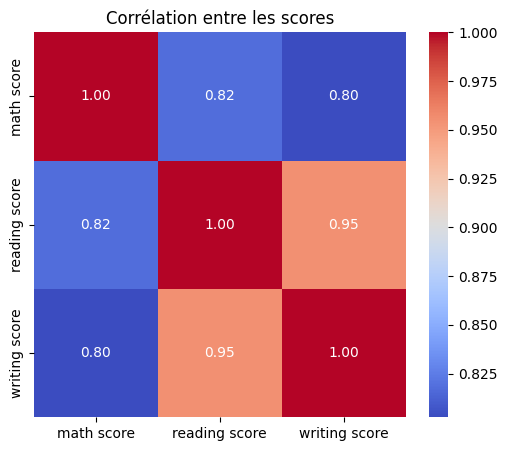

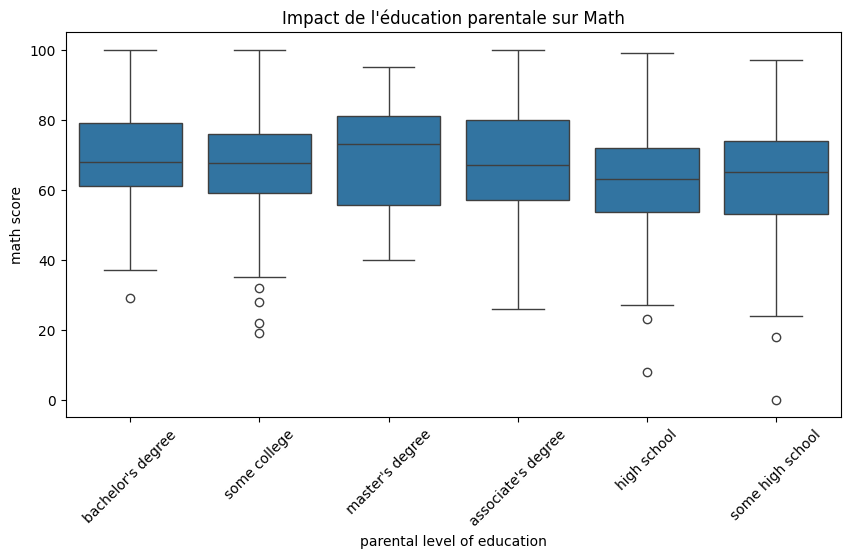

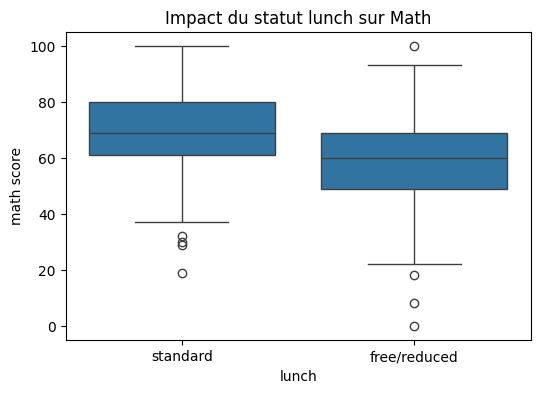

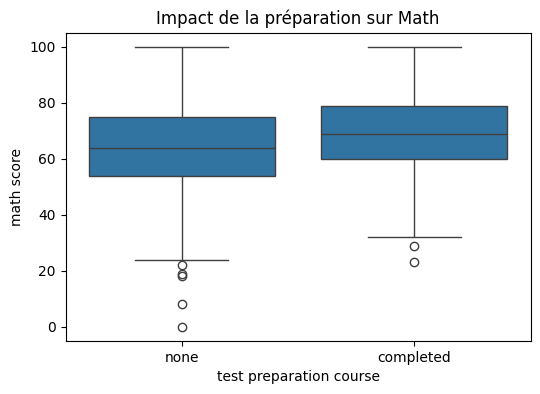

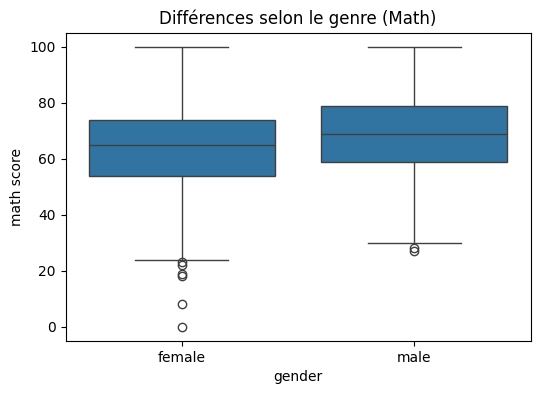

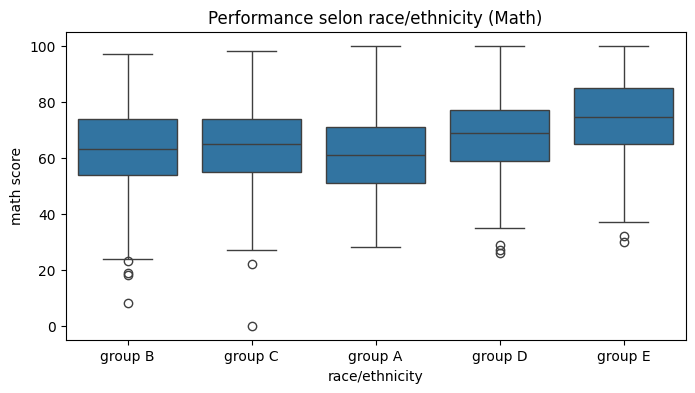

In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("StudentsPerformance.csv")

matieres = ["math score", "reading score", "writing score"]


correlation = data[matieres].corr()

print(correlation)

plt.figure(figsize=(6,5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les scores")
plt.show()



plt.figure(figsize=(10,5))
sns.boxplot(x="parental level of education", y="math score", data=data)
plt.xticks(rotation=45)
plt.title("Impact de l'éducation parentale sur Math")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="lunch", y="math score", data=data)
plt.title("Impact du statut lunch sur Math")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="test preparation course", y="math score", data=data)
plt.title("Impact de la préparation sur Math")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(x="gender", y="math score", data=data)
plt.title("Différences selon le genre (Math)")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="race/ethnicity", y="math score", data=data)
plt.title("Performance selon race/ethnicity (Math)")
plt.show()
